### 1. Import Needed Libraries

<pre>
Input   : -
Output  : -
Process : 
Import some needed Python libraries and models such as
    1. PIL Image: Opens and saves an image. 
    2. OS : Document directory management and Path manipulation. 
    3. Time : Timing of program operations. 
    4. IO: Manipulation of data in the data stream in the device memory. 
    5. Request: Downloading an image from a website. 
    6. JSON: Manipulate string variables into Python JSON objects. 
    7. Regex: Pattern matching in strings. 
    8. Pandas: Read CSV files and write them into data frames. 
    9. WebDriver: Controls the website browser. 
    10. BY : Define element selection criteria with Xpath. 
    11. WebDriverWait : Pauses the WebDriver process. 
    12. Expected_Conditions : Checks the elements in the Document Object Model. 
    13. ActionChains : Automate website element click commands.
</pre>

In [ ]:
import os
import io
import time
import json
import requests
import regex as re
import pandas as pd
from PIL import Image
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.by import By  

### 2. Run Program Variant Sie

<pre>
Input   : Product link
Output  : Product images in subfolder
Process : 
Open the file product_links.txt and read all the links.
    1. Initialize the Selenium WebDriver.
    2. Specify the directory to save images.
    3. Waiting for all elements to be loaded on the website
    4. Find Variant Shade elements using an XPath pattern. If elements are found, record the link in the found links file.
    5. Try to download the image and save it to the subfolder and filter them into 1000x1000 pixel.
    6. Ceate lists to track successful and failed downloads.
    7. Print the links that failed to download.
</pre>
Diagram alur program scraping:
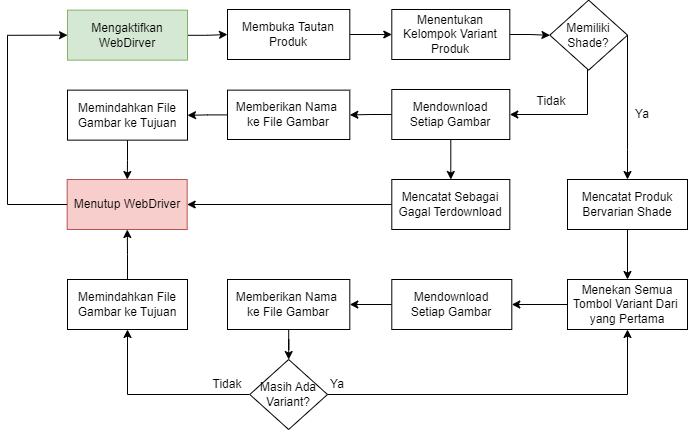

In [ ]:
with open("D:\\Kerja\\recommendation_skin_analyst\\28-07-2023_ProductScraping\\data\\Sephora_ID\\product_links.txt", "r") as file:
    links = file.readlines()

driver = webdriver.Chrome()

base_directory = "D:\\Kerja\\recommendation_skin_analyst\\28-07-2023_ProductScraping\\data\\Sephora_ID\\product_images"
found_links_file = "D:\\Kerja\\recommendation_skin_analyst\\28-07-2023_ProductScraping\\data\\Sephora_ID\\found_links.txt"

success_links = []
failed_links = []

for link in links:
    link = link.strip()

    subfolder_name = link.split("/")[-3]
    subfolder_directory = os.path.join(base_directory, subfolder_name)

    os.makedirs(subfolder_directory, exist_ok=True)
    driver.get(link)
    time.sleep(10)

    images = driver.find_elements(By.CSS_SELECTOR, "img.variant-image-border-space")
    count = 1

    xpath_pattern = "//li[contains(@class, 'product-variant-swatch') and contains(@class, 'product-variant-shade') and contains(@class, 'product-variant-swatch-')]"
    elements = driver.find_elements(By.XPATH, xpath_pattern)

    if elements:
        with open(found_links_file, "a") as f:
            f.write(link + "\n")

    # Function to clean the filename
    def clean_filename(filename):
        return re.sub(r'[^\w\-_\.\+]', '', filename)

    for image in images: 
        image_url = image.get_attribute("src")
        alt_text = image.get_attribute("alt")
        filename = f"image_{count}_{alt_text}.png"
        
        if not image_url:
            failed_links.append(link)
            continue

        try:
            response = requests.get(image_url, stream=True)
            image_data = response.content
            img = Image.open(io.BytesIO(image_data))

            if img.width == 1000 and img.height == 1000:
                with open(os.path.join(subfolder_directory, filename), "wb") as f:
                    f.write(image_data)
                success_links.append(link)
            else:
                failed_links.append(link)
        except Exception as e:
            print(f"Gagal mengunduh gambar dari link: {link}, dengan kesalahan: {e}")
            failed_links.append(link)
        
        count += 1

driver.quit()

print("\nLinks that failed to download:")
for link in failed_links:
    print(link)

### 3. Run Program Variant Shade

<pre>
Input   : Product link from found_links.txt
Output  : Product images in subfolder
Process : 
Open the file product_links.txt and read all the links.
    1. Initialize the Selenium WebDriver.
    2. Specify the directory to save images.
    3. Waiting for all elements to be loaded on the website.
    4. Press each Xpath of the variant shade button using ActionChains.
    5. Try to download the image and save it to the subfolder and filter them into 1000x1000 pixel.
    6. Create lists to track successful and failed downloads.
    7. Print the links that failed to download.
</pre>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import regex as re
import time
import json
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.by import By
import os
from PIL import Image
import io  

with open("D:\\Kerja\\recommendation_skin_analyst\\28-07-2023_ProductScraping\\data\\Sephora_ID\\found_links.txt", "r") as file:
    links = file.readlines()

driver = webdriver.Chrome()

base_directory = "D:\\Kerja\\recommendation_skin_analyst\\28-07-2023_ProductScraping\\data\\Sephora_ID\\product_images"
found_links_file = "D:\\Kerja\\recommendation_skin_analyst\\28-07-2023_ProductScraping\\data\\Sephora_ID\\found_links.txt"

success_links = []
failed_links = []

for link in links:
    link = link.strip()

    subfolder_name = link.split("/")[-3]
    subfolder_directory = os.path.join(base_directory, subfolder_name)

    os.makedirs(subfolder_directory, exist_ok=True)
    driver.get(link)
    time.sleep(10)
    
    action = ActionChains(driver)
    
    xpath_pattern = "//li[contains(@class, 'product-variant-swatch') and contains(@class, 'product-variant-shade') and contains(@class, 'product-variant-swatch-')]"

    try:
        elements = driver.find_elements(By.XPATH, xpath_pattern)
    except Exception as e:
        print(f"Failed to find elements: {e}")
        elements = []

    if not elements:
        print("No elements found, continuing with image download process.")
        continue
    
    for element in elements:
        try:
            action.click(element).perform()
            WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "img.variant-image-border-space")))
            images = driver.find_elements(By.CSS_SELECTOR, "img.variant-image-border-space")

            count = 1

            def clean_filename(filename):
                return re.sub(r'[^\w\-_\.\+]', '', filename)

            for image in images:
                image_url = image.get_attribute("src")

                alt_text = image.get_attribute("alt")

                filename = f"image_{count}_{alt_text}.png"

                if not image_url:
                    failed_links.append(image_url)
                    continue

                try:
                    response = requests.get(image_url, stream=True)
                    image_data = response.content
                    img = Image.open(io.BytesIO(image_data))

                    if img.width == 1000 and img.height == 1000:
                        with open(os.path.join(subfolder_directory, filename), "wb") as f:
                            f.write(image_data)
                        success_links.append(link)
                    else:
                        failed_links.append(link)
                except Exception as e:
                    print(f"Gagal mengunduh gambar dari link: {link}, dengan kesalahan: {e}")
                    failed_links.append(link)

                count += 1
                
        except Exception as e:
            print(f"Failed to click element: {e}")
    
driver.quit()

print("Links successfully downloaded:")
for link in success_links:
    print(link)

print("\nLinks that failed to download:")
for link in failed_links:
    print(link)


### 4. Data Cleansing
<pre>
Input : Output from the link that failed to download
Output : Failed product links
Process : 
Copy all output if you want to confirm what links failed into the gagal.txt file. The cleaned list of links can be re-scraped or something else.

In [ ]:
#### Cleanse to redownload Product Link
def extract_failed_links(file_path):
    failed_links = []
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        for line in lines:
            if "Gagal mengunduh gambar dari link" in line:
                start_index = line.find("https://")
                end_index = line.find(", dengan kesalahan:")
                if start_index != -1 and end_index != -1:
                    link = line[start_index:end_index]
                    failed_links.append(link.strip())
    return failed_links

file_path = r"D:\Kerja\recommendation_skin_analyst\28-07-2023_ProductScraping\data\Sephora_ID\gagal.txt"
failed_links = extract_failed_links(file_path)
for link in failed_links:
    print(link)


In [ ]:
#### Remove dupllicates
def remove_duplicate_links(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    unique_lines = list(set(lines))

    with open(file_path, 'w') as file:
        for line in unique_lines:
            file.write(line)

if __name__ == "__main__":
    file_path = r"D:\Kerja\recommendation_skin_analyst\28-07-2023_ProductScraping\data\Sephora_ID\gagal.txt"
    remove_duplicate_links(file_path)
    print("Duplikat telah dihapus dari file:", file_path)


### Check Folders

In [ ]:
import os

def count_empty_and_non_empty_subfolders(folder_path):
    empty_folders_count = 0
    non_empty_folders_count = 0

    for root, dirs, files in os.walk(folder_path):
        if not dirs and not files:
            empty_folders_count += 1
        else:
            non_empty_folders_count += 1

    return empty_folders_count, non_empty_folders_count

if __name__ == "__main__":
    folder_path = r"D:\Kerja\recommendation_skin_analyst\28-07-2023_ProductScraping\data\Sephora_ID\product_images"
    empty_folders_count, non_empty_folders_count = count_empty_and_non_empty_subfolders(folder_path)
    print("Jumlah subfolder kosong:", empty_folders_count)
    print("Jumlah subfolder non-kosong:", non_empty_folders_count)
